In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from plotnine import *
from plotnine.animation import PlotnineAnimation
from plotnine.data import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format

import warnings
warnings.filterwarnings('ignore')

In [2]:
def transform_data_transp(data):
    
    data_transp = {'date':[], 'category':[], 'quantity':[]}

    for year in range(1985, 2018):
        fn = list(data.loc[data['year'] == year]['fn'].values)[0]
        fp = list(data.loc[data['year'] == year]['fp'].values)[0]
        tn = list(data.loc[data['year'] == year]['tn'].values)[0]
        tp = list(data.loc[data['year'] == year]['tp'].values)[0]

        data_transp['date'].append(str(year) + '-01-01')
        data_transp['category'].append('tp')
        data_transp['quantity'].append(tp)


        data_transp['date'].append(str(year) + '-01-01')
        data_transp['category'].append('fn')
        data_transp['quantity'].append(fn)


        data_transp['date'].append(str(year) + '-01-01')
        data_transp['category'].append('fp')
        data_transp['quantity'].append(fp)

        data_transp['date'].append(str(year) + '-01-01')
        data_transp['category'].append('tn')
        data_transp['quantity'].append(tn)

    return pd.DataFrame.from_dict(data_transp)

In [3]:
lapig_matrix = pd.read_csv('./errormatrix_infra_lapig_1anoee_export.csv')
web_matrix = pd.read_csv('./errormatrix_infra_webcoll_1anoee_export.csv')
print(lapig_matrix.tail(3))

    system:index   fn  fp     tn   tp  year  .geo
30            30  125  23  30798  503  2015   NaN
31            31  138  20  30800  491  2016   NaN
32            32  128  21  30799  501  2017   NaN


In [5]:
web_matrix_transp = transform_data_transp(web_matrix)
web_matrix_transp = web_matrix_transp[web_matrix_transp['category'] != 'tn']

In [6]:
lapig_matrix_transp = transform_data_transp(lapig_matrix)
lapig_matrix_transp = lapig_matrix_transp[lapig_matrix_transp['category'] != 'tn']

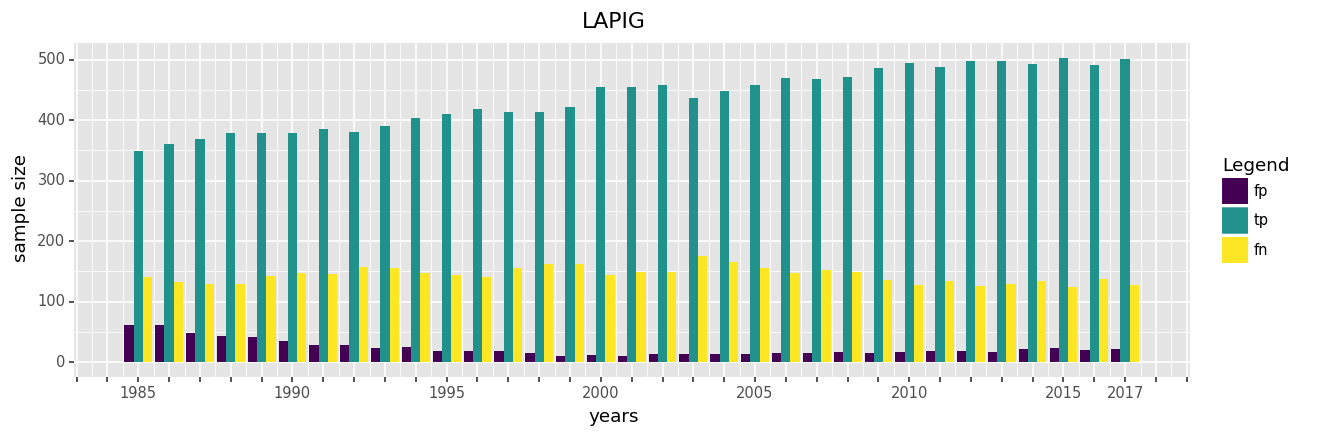

<ggplot: (-9223363305649049421)>

In [7]:
def custom_date_format1(breaks):
    """
    Function to format the date
    """
    return [x.year if x.year%5==0 or x.year==2017 else "" for x in breaks]



category_list = lapig_matrix_transp['category'].value_counts().index.tolist()
category_cat = CategoricalDtype(categories=category_list, ordered=True)

lapig_matrix_transp['category_cat'] = lapig_matrix_transp['category'].astype(str).astype(category_cat)

p1 = (ggplot(lapig_matrix_transp )
 + geom_bar(aes(x='date', y='quantity', fill='category_cat'), stat='identity', position = position_dodge())
 + scale_x_datetime(breaks=date_breaks('1 years'), labels=custom_date_format1)
 + labs(y='sample size', x='years', title="LAPIG")
 + guides(                                                        # new
     fill=guide_legend(title='Legend',))
)

p1 + theme(
    panel_background=element_rect(fill='gray', alpha=.2),
    dpi=120,
    figure_size=(12, 6), # inches
    aspect_ratio=0.3    # height:width
) 

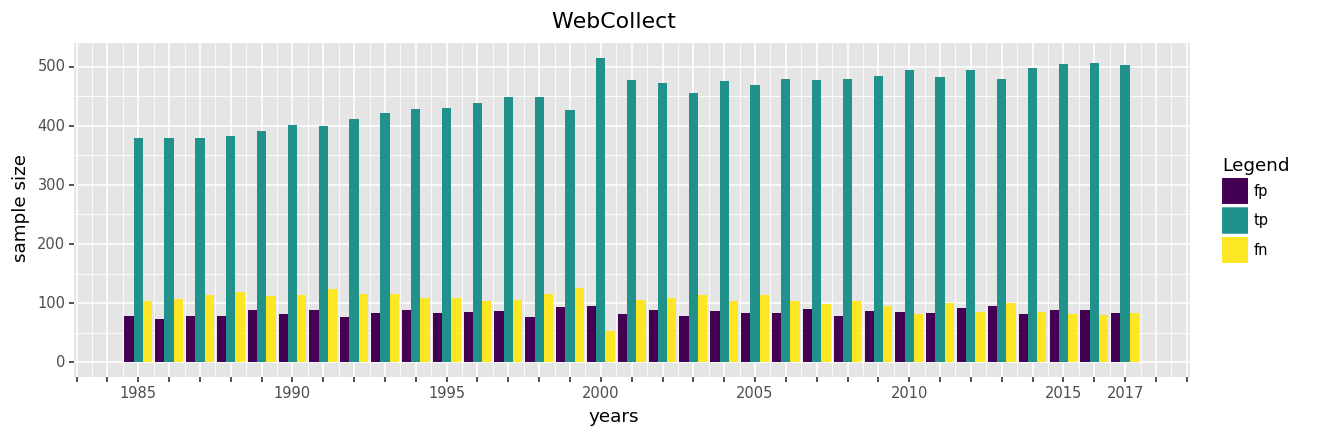

<ggplot: (-9223363305649049498)>

In [8]:
category_list = web_matrix_transp['category'].value_counts().index.tolist()
category_cat = CategoricalDtype(categories=category_list, ordered=True)

web_matrix_transp['category_cat'] = web_matrix_transp['category'].astype(str).astype(category_cat)

p1 = (ggplot(web_matrix_transp )
 + geom_bar(aes(x='date', y='quantity', fill='category_cat'), stat='identity', position = position_dodge())
 + scale_x_datetime(breaks=date_breaks('1 years'), labels=custom_date_format1)
 + labs(y='sample size', x='years', title="WebCollect")
 + guides(                                                        # new
     fill=guide_legend(title='Legend',))
)

p1 + theme(
    panel_background=element_rect(fill='gray', alpha=.2),
    dpi=120,
    figure_size=(12, 6), # inches
    aspect_ratio=0.3    # height:width
) 

In [9]:
web_matrix_transp = transform_data_transp(web_matrix)
lapig_matrix_transp = transform_data_transp(lapig_matrix)

In [10]:
def get_perfomance(data_matrix):
    tp = data_matrix['tp']
    fn = data_matrix['fn']
    fp = data_matrix['fp']
    tn = data_matrix['tn']
    tnr =  tn/(tn + fp)
    performance = data_matrix[['year']]
    performance['date'] = performance['year'].astype(str) + "-01-01"
    performance['recall'] = tp/(tp + fn)
    performance['precision'] = tp/(tp + fp)
    performance['accuracy'] = (tp + tn)/(tp + tn + fp + fn)
    performance['bal_accuracy'] = (performance['recall'] + tnr)/2
    del performance['year']
    
    return performance

In [11]:
web_matrix_perf =  get_perfomance(web_matrix)
lapig_matrix_perf =  get_perfomance(lapig_matrix)

In [12]:
lapig_matrix_perf.head()

,date,recall,precision,accuracy,bal_accuracy
0,1985-01-01,0.713701,0.849148,0.993577,0.855849
1,1986-01-01,0.730223,0.855107,0.993831,0.864126
2,1987-01-01,0.739479,0.884892,0.994340,0.868964
3,1988-01-01,0.744094,0.895735,0.994467,0.871336
4,1989-01-01,0.726923,0.902148,0.994181,0.862799


In [13]:
web_matrix_perf.head()

,date,recall,precision,accuracy,bal_accuracy
0,1985-01-01,0.784679,0.829322,0.978308,0.887407
1,1986-01-01,0.779835,0.838496,0.978477,0.885284
2,1987-01-01,0.770325,0.829322,0.977254,0.880229
3,1988-01-01,0.762475,0.830435,0.976589,0.876310
4,1989-01-01,0.777336,0.816284,0.976227,0.883105


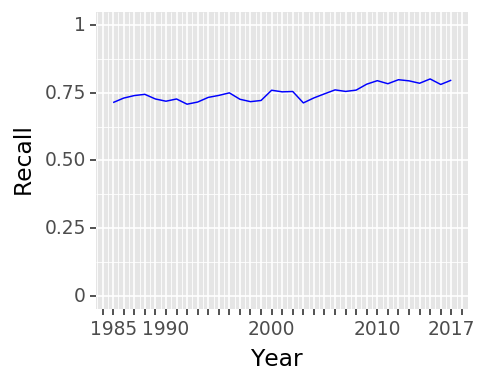

<ggplot: (8731202904661)>


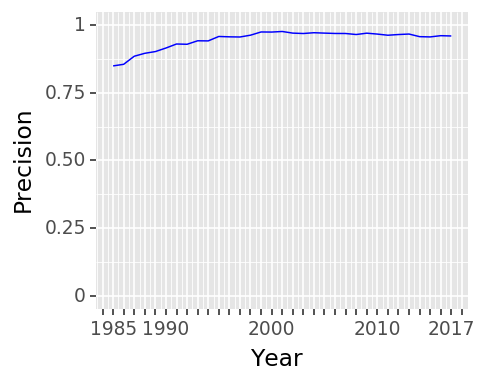

<ggplot: (-9223363305652065620)>


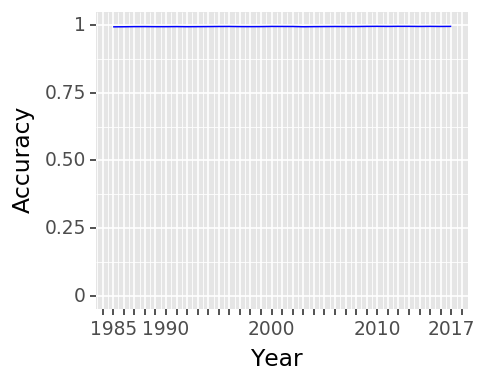

<ggplot: (8731202647104)>


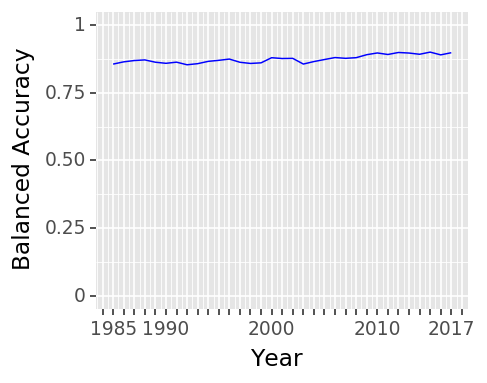

<ggplot: (-9223363305652048405)>


In [15]:
def custom_date_format1(breaks):
    """
    Function to format the date
    """
    return [x.year if x.year%10==0 or x.year==2017 or x.year==1985 else "" for x in breaks]

p1 = (ggplot(lapig_matrix_perf) 
 + aes('date', 'recall') 
 + scale_x_datetime(breaks=date_breaks('1 years'), labels=custom_date_format1)
 + ylab('Recall')
 + xlab('Year')
 + geom_line(color='blue', group=1) 
 + ylim(0, 1)     
 + theme_gray(base_size=14)) 

p1 = p1 + theme(
    panel_background=element_rect(fill='gray', alpha=.2),
    dpi=120,
    figure_size=(4, 4),
    aspect_ratio=0.8
) 

print(p1)


p2 = (ggplot(lapig_matrix_perf) 
 + aes('date', 'precision') 
 + geom_line(color='blue', group=1)
 + ylab('Precision')
 + xlab('Year')
 + scale_x_datetime(breaks=date_breaks('1 years'), labels=custom_date_format1)
 + ylim(0, 1)     
 + theme_gray(base_size=14)) 

p2 = p2 + theme(
    panel_background=element_rect(fill='gray', alpha=.2),
    dpi=120,
    figure_size=(4, 4),
    aspect_ratio=0.8
) 

print(p2)

p3 = (ggplot(lapig_matrix_perf) 
 + aes('date', 'accuracy') 
 + geom_line(color='blue', group=1)
 + ylab('Accuracy')
 + xlab('Year')
 + scale_x_datetime(breaks=date_breaks('1 years'), labels=custom_date_format1)
 + ylim(0, 1)     
 + theme_gray(base_size=14)) 

p3 = p3 + theme(
    panel_background=element_rect(fill='gray', alpha=.2),
    dpi=120,
    figure_size=(4, 4),
    aspect_ratio=0.8
) 

print(p3)

p4 = (ggplot(lapig_matrix_perf) 
 + aes('date', 'bal_accuracy') 
 + geom_line(color='blue', group=1)
 + ylab('Balanced Accuracy')
 + xlab('Year')
 + scale_x_datetime(breaks=date_breaks('1 years'), labels=custom_date_format1)
 + ylim(0, 1)     
 + theme_gray(base_size=14)) 

p4 = p4 + theme(
    panel_background=element_rect(fill='gray', alpha=.2),
    dpi=120,
    figure_size=(3, 4),
    aspect_ratio=0.8
) 

print(p4)

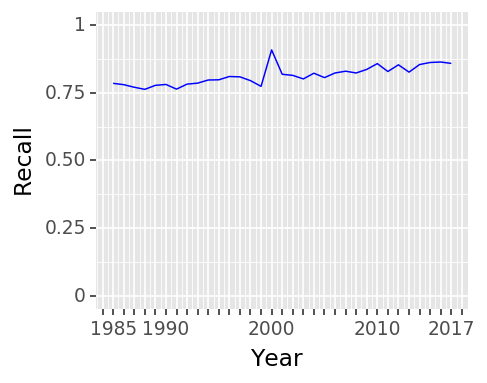

<ggplot: (-9223363305651822690)>


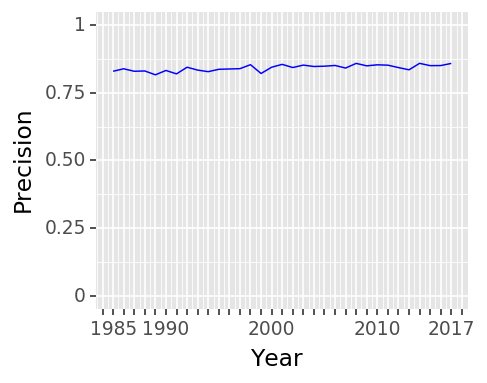

<ggplot: (-9223363305652088793)>


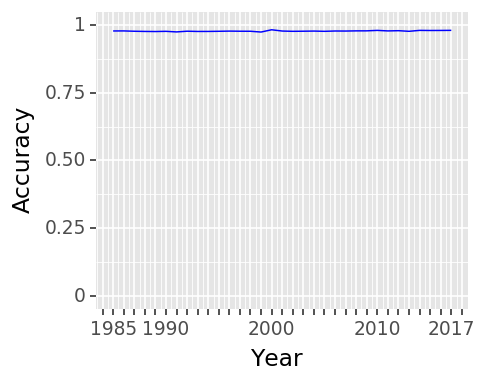

<ggplot: (8731202715207)>


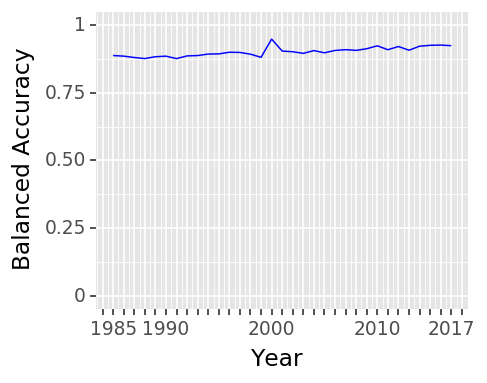

<ggplot: (-9223363305652230873)>


In [17]:
def custom_date_format1(breaks):
    """
    Function to format the date
    """
    return [x.year if x.year%10==0 or x.year==2017 or x.year==1985 else "" for x in breaks]





p1 = (ggplot(web_matrix_perf) 
 + aes('date', 'recall') 
 + scale_x_datetime(breaks=date_breaks('1 years'), labels=custom_date_format1)
 + ylab('Recall')
 + xlab('Year')
 + geom_line(color='blue', group=1) 
 + ylim(0, 1)     
 + theme_gray(base_size=14)) 

p1 = p1 + theme(
    panel_background=element_rect(fill='gray', alpha=.2),
    dpi=120,
    figure_size=(4, 4),
    aspect_ratio=0.8
) 

print(p1)


p2 = (ggplot(web_matrix_perf) 
 + aes('date', 'precision') 
 + geom_line(color='blue', group=1)
 + ylab('Precision')
 + xlab('Year')
 + scale_x_datetime(breaks=date_breaks('1 years'), labels=custom_date_format1)
 + ylim(0, 1)     
 + theme_gray(base_size=14)) 

p2 = p2 + theme(
    panel_background=element_rect(fill='gray', alpha=.2),
    dpi=120,
    figure_size=(4, 4),
    aspect_ratio=0.8
) 

print(p2)

p3 = (ggplot(web_matrix_perf) 
 + aes('date', 'accuracy') 
 + geom_line(color='blue', group=1)
 + ylab('Accuracy')
 + xlab('Year')
 + scale_x_datetime(breaks=date_breaks('1 years'), labels=custom_date_format1)
 + ylim(0, 1)     
 + theme_gray(base_size=14)) 

p3 = p3 + theme(
    panel_background=element_rect(fill='gray', alpha=.2),
    dpi=120,
    figure_size=(4, 4),
    aspect_ratio=0.8
) 

print(p3)

p4 = (ggplot(web_matrix_perf) 
 + aes('date', 'bal_accuracy') 
 + geom_line(color='blue', group=1)
 + ylab('Balanced Accuracy')
 + xlab('Year')
 + scale_x_datetime(breaks=date_breaks('1 years'), labels=custom_date_format1)
 + ylim(0, 1)     
 + theme_gray(base_size=14)) 

p4 = p4 + theme(
    panel_background=element_rect(fill='gray', alpha=.2),
    dpi=120,
    figure_size=(4, 4),
    aspect_ratio=0.8
) 

print(p4)